회귀모델

- 지도학습(정답데이터 필수)
- 예측 

- remote collarboration - review1
- 감정인식 + GAN 
- Don't bother me - review 2(deep learning algorithm)


- 도미와 빙어를 구분하는 머신러닝 모델을 성공적으로 개발한 후 자신감이 생겼음
- 새로운 요구사항이 있음

현재상황 :여름 농어철로 농어주문이 크게 늘어나, 마켓은 업계최초로 농어를 무게 단위로 판매하고자 함(농어를 마리당 가격으로 판매했더니 볼품없는 농어를 받는 고객이 항의함)

요구사항 : 농어의 길이를 가지고 무게를 예측 

#### 1. K-NN 회귀

- 분류와 동일하게 임의의 데이터의 예측값을 예측하기 위해서 K개의 이웃의 수치데이터를 바탕으로 **평균**을 내어 예측하는 방법

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### 1. Data Load

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [4]:
print(type(perch_length))
print(type(perch_weight))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
# 모델의 개수 
print(len(perch_length))
print(len(perch_weight))

56
56


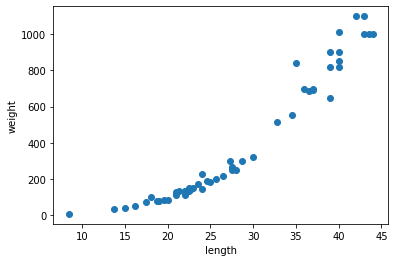

In [11]:
# 농어의 길이가 늘어나면, 무게도 늘어난다
# => 양의 상관관계(**시험출제**)
# 상관계수값 : -1~1 (0.4 이상 정도 되면 관계가 있다고 판단함)

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#### 2. Train/Test Split

In [16]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
# 클래스가 1개이므로 random 추출 => 샘플링 편향이 일어날 수 있음

In [18]:
# default(75:25)
print(train_input.shape, test_input.shape)

(42,) (14,)


In [19]:
print(train_input)

[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
 43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
 28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5]


#### 3. Data Preprocess

- scikit-learn 모듈 : 머신러닝 모델 사용 
- => 반드시 2차원 배열(행렬)값을 모델의 입력데이터로 사용
<br>
- 1차원 배열 [1,2,3,4,5]
- 2차원 배열 [[1], [2], [3]]

In [23]:
# 1차원 배열 
print(perch_length.shape) 

(56,)


In [25]:
# numpy의 reshape() 함수 사용 => shape 변형 가능 
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [32]:
test_array = test_array.reshape(2,2)
print(test_array.shape)

(2, 2)


In [33]:
test_array

array([[1, 2],
       [3, 4]])

In [42]:
# -1을 사용하면, -1은 무시하고(상관없고) 그 옆에 있는 숫자만 shape으로 맞춰라
train_input = train_input.reshape(-1, 1) 
test_input = test_input.reshape(-1, 1)

In [43]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [45]:
# 회귀모델 사용
from sklearn.neighbors import KNeighborsRegressor

In [47]:
# 모델 생성
knr = KNeighborsRegressor()

In [49]:
# 모델 학습
knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

### 5. 결정계수

**상관계수(r)**
- 두 양적변수간 회귀관계 측정 시 사용
- 상관관계 정도를 나타냄
- -1~1 사이의 값

**결정계수(r^2)**
- 회귀선에 각각의 값들이 얼마나 가까운지를 측정
- 회귀선이 얼마나 실제 값을 잘 예측할 수 있는 지를 말해줌
- 0~1 사이의 값(제곱했기 때문에 음수는 나올 수 없음)
- r^2의 값이 1에 가까워질수록 정확해진다(정확도 up)

- 공식 : $R^2 = 1-(타깃-예측)^2의 합 / (타깃-평균)^2의 합$


In [53]:
# 모델 테스트(test 데이터 입력)
# 회귀모델에서 정확도 개념이 없음 => 결정계수(R^2 or R**2) 이용 
knr.score(test_input, test_target)  

0.9928094061010639

### 6. MAE(Mean Absolute Error)
- 타깃과 예측의 오차의 절댓값을 평균해서 반환


In [54]:
from sklearn.metrics import mean_absolute_error

In [60]:
test_prediction = knr.predict(test_input) # 예측값
mae = mean_absolute_error(test_target, test_prediction) # 타깃(실제값)과 예측값을 입력해서 평균오차 반환

print(mae)  # 19kg의 평균 오차를 갖음 (비교적 잘 예측함)

19.157142857142862
